In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

In [ ]:
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sns.set()

In [ ]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [ ]:
# to split the data into train and test
from sklearn.model_selection import train_test_split
# to build linear regression_model
from sklearn.linear_model import LinearRegression
# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# I changed this part
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [ ]:
# Importing Libraries
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
import joblib
from IPython.display import display
import pickle
df=pd.read_csv('/content/parkinsons dataset.csv')

In [ ]:
df.head()



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [ ]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  195


In [ ]:
# Dropping The Name Column
df.drop(['name'], axis=1, inplace=True)

In [ ]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 23
Number of Instances In Dataset :  195


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df['status'] = df['status'].astype('uint8')

In [ ]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


In [ ]:
# Checking For Missing Values In Dataset
df.isna().sum()

,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


<Axes: xlabel='status', ylabel='count'>

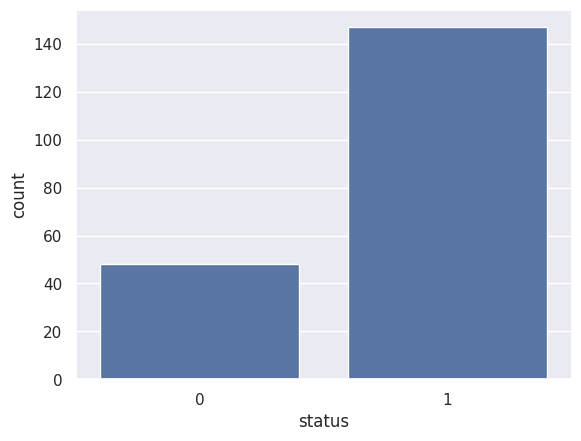

In [ ]:
#Balance of Data
sns.countplot(x='status',data=df)


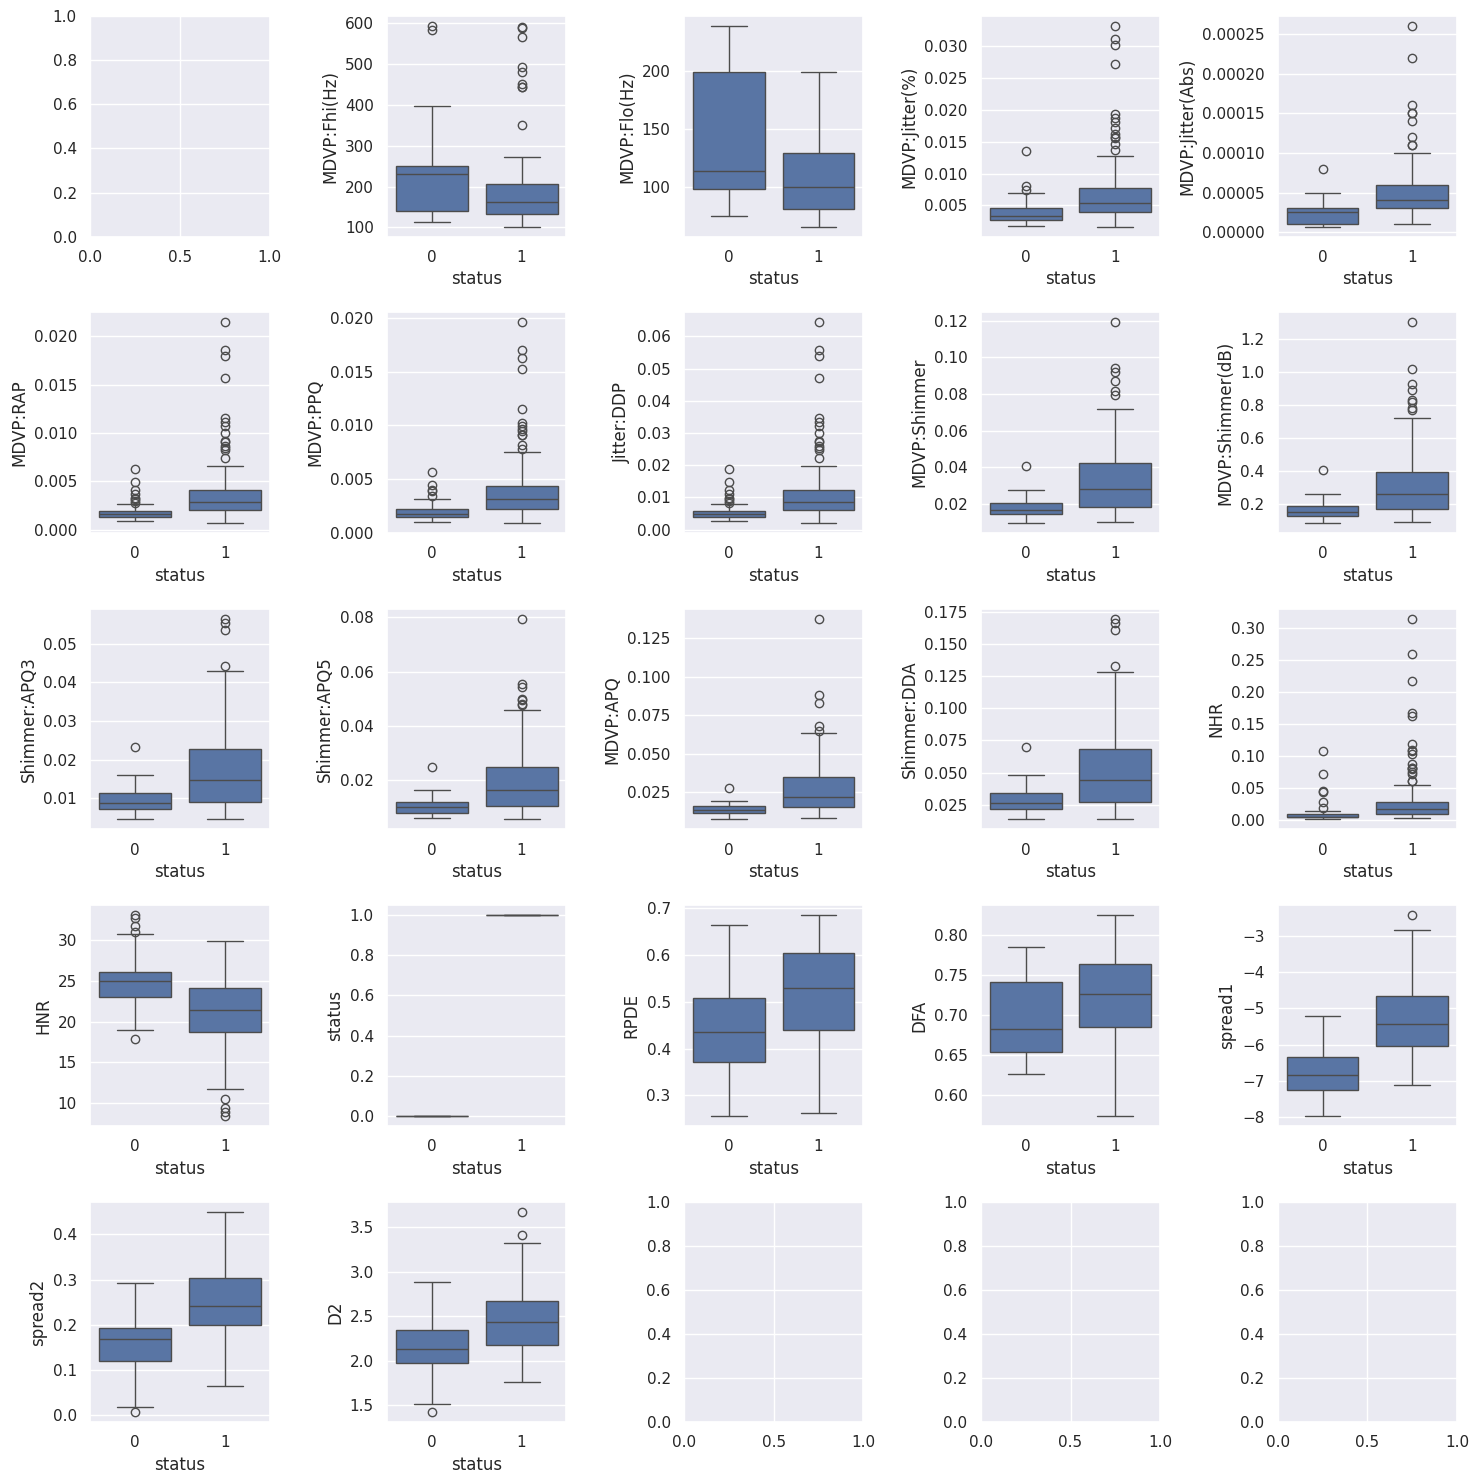

In [ ]:
#Box Plot
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()
for i in range(1,len(df.columns)-1):
    sns.boxplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

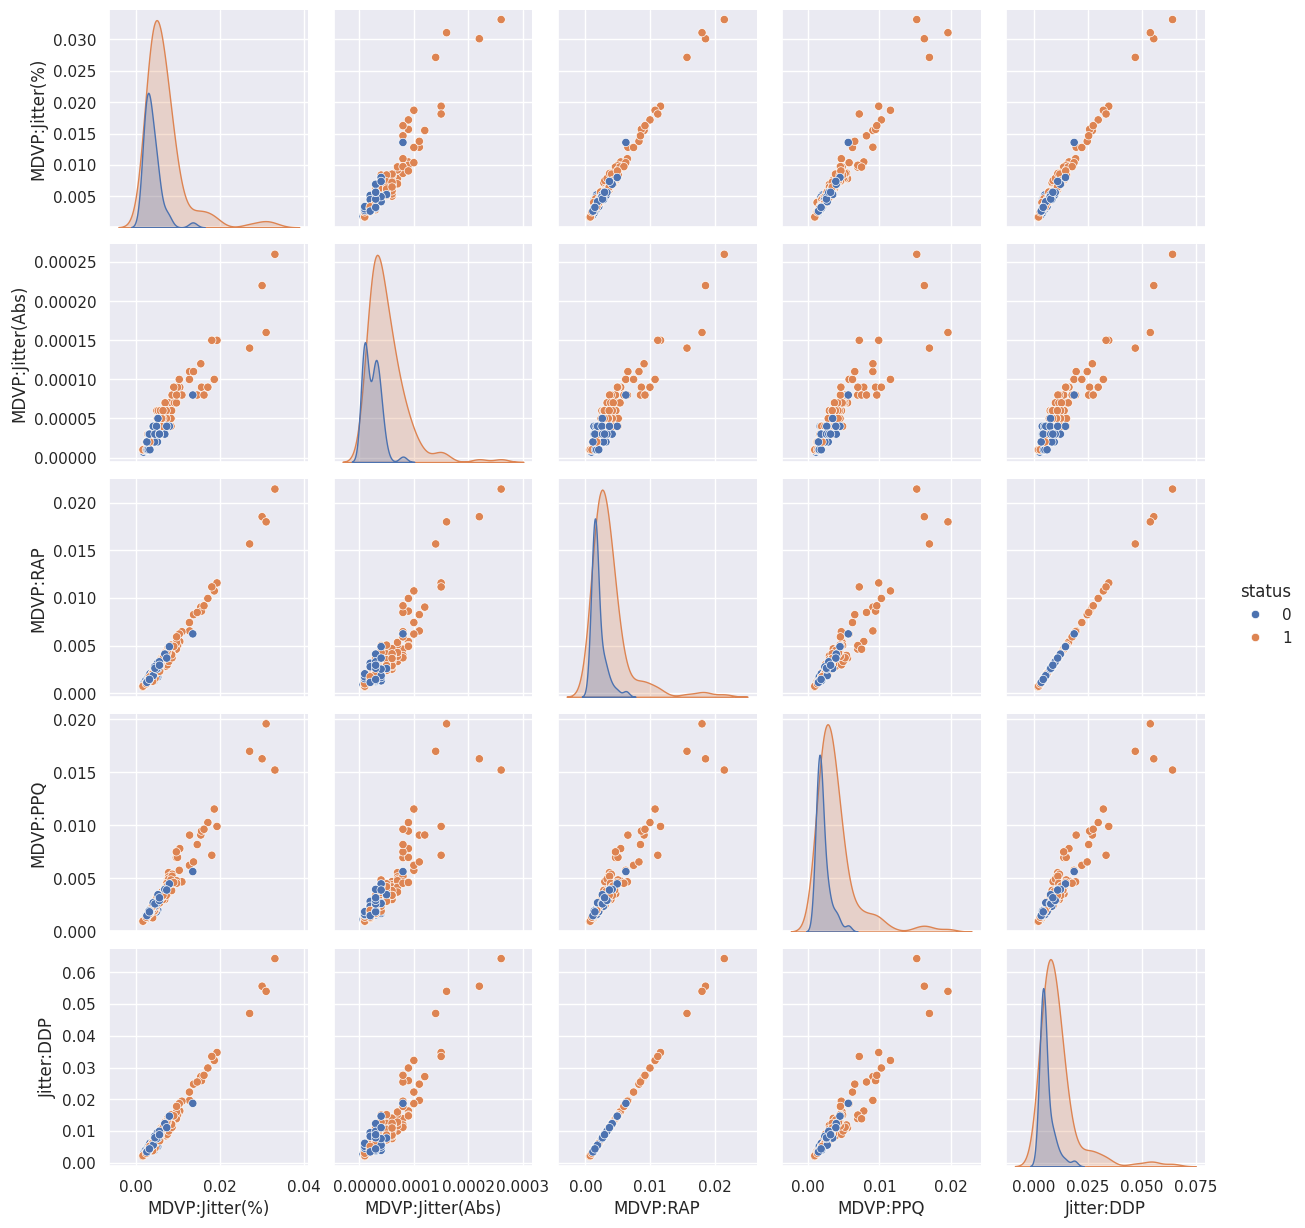

In [ ]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'] )
plt.show()

<Axes: >

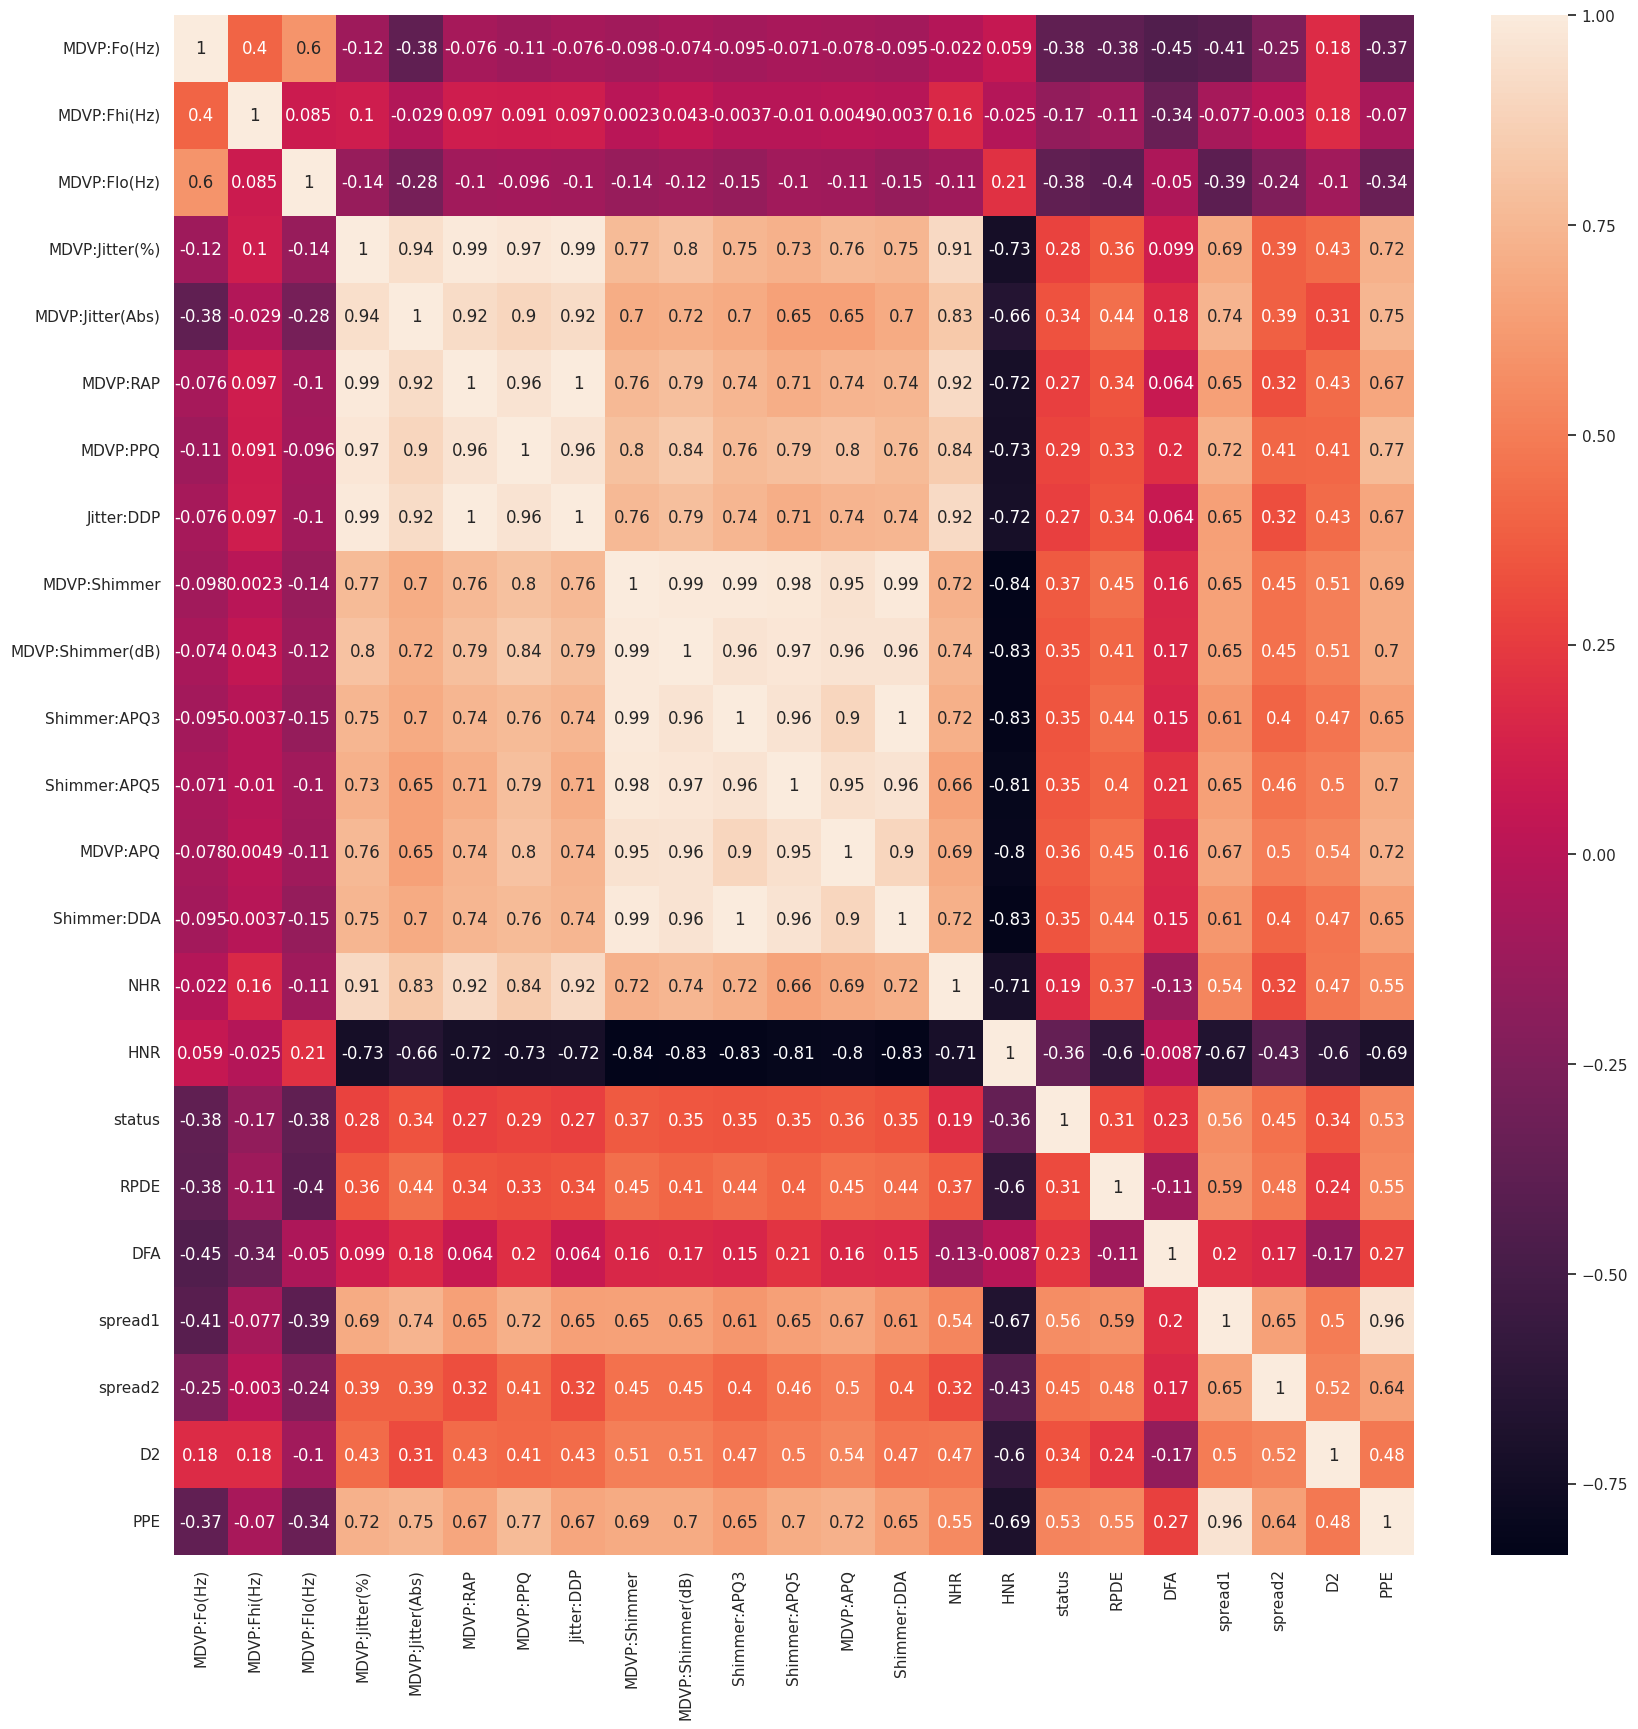

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,ax=ax)

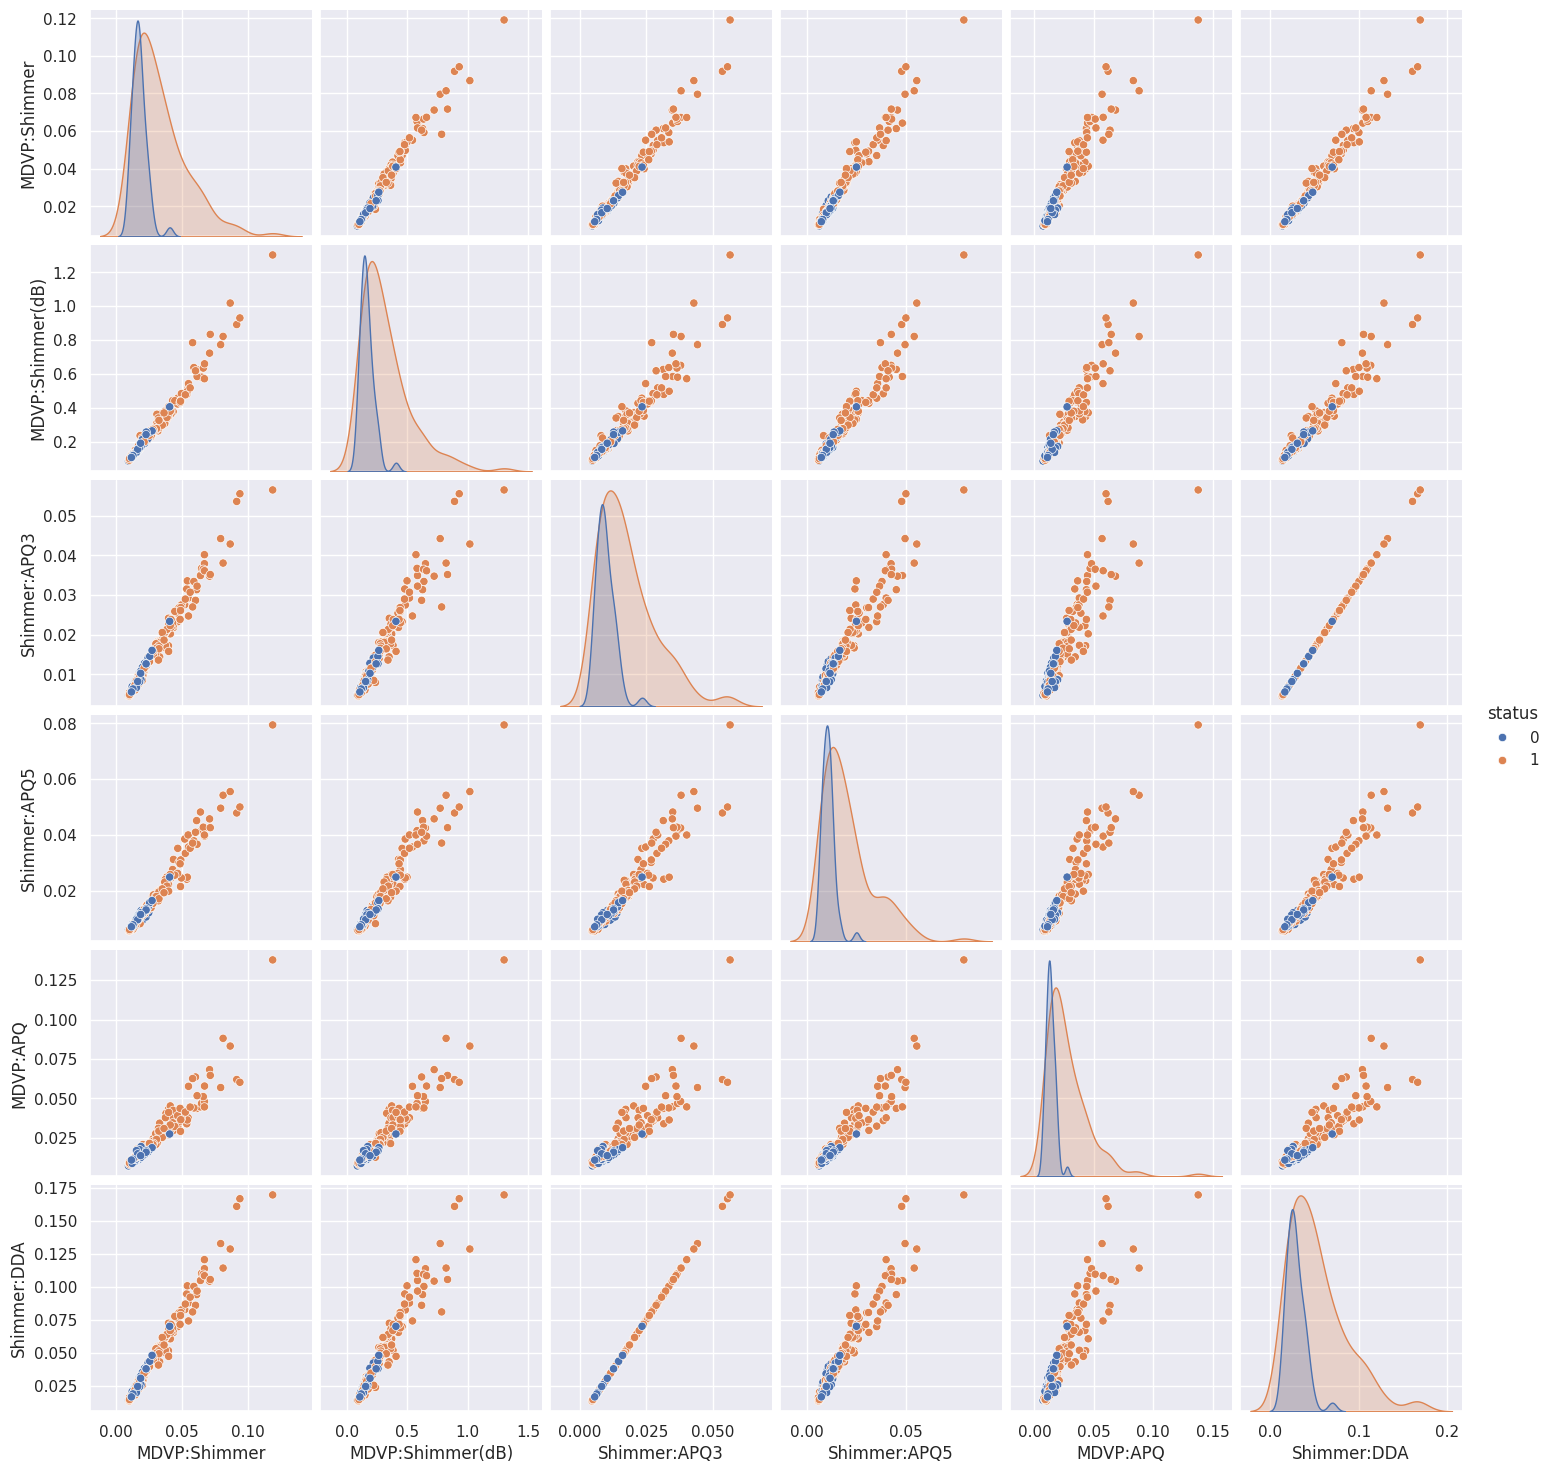

In [ ]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()


In [ ]:
# Exploring Imabalance In Dataset
df['status'].value_counts()

,count
status,
1,147
0,48


In [ ]:
X = df.drop(['status'], axis=1)
y = df['status']

In [ ]:
print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)



Feature (X) Shape Before Balancing : (195, 22)
Target (y) Shape Before Balancing : (195,)


In [ ]:
y=df['status']
cols=['MDVP:RAP','Jitter:DDP','DFA','NHR','MDVP:Fhi(Hz)','status']
x=df.drop(cols,axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Scaling features between -1 and 1 for mormalization
scaler = MinMaxScaler((-1,1))

In [ ]:
# define X_features , Y_labels
X_features = scaler.fit_transform(X)
Y_labels = y

In [ ]:
# splitting the dataset into traning and testing sets into 80 - 20
train_size=0.80
test_size=0.20
seed=5
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_features, Y_labels , test_size=0.20, random_state=20)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predlog = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, predlog))
print("Confusion Matrix:")
confusion_matrix(y_test, predlog)

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.84      0.96      0.90        27

    accuracy                           0.85        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.85      0.85      0.84        39

Confusion Matrix:


array([[ 7,  5],
       [ 1, 26]])

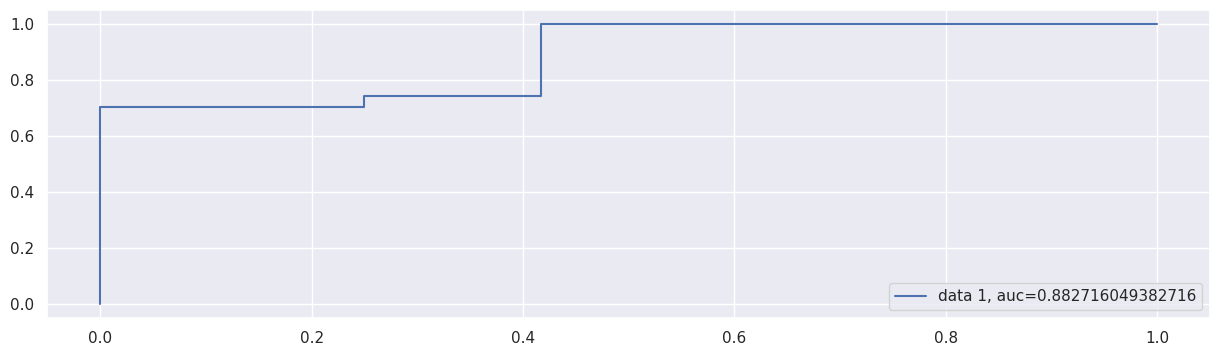

In [ ]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Dumping Logistic Regression Model
pickle.dump(logmodel, open('lg.pkl','wb'))

In [ ]:
# Naive Bayes
gnb = Naive_Bayes()
gnb.fit(X_train, y_train)
predgnb = gnb.predict(X_test)
print(classification_report(y_test, predgnb))

              precision    recall  f1-score   support

           0       0.46      0.92      0.61        12
           1       0.93      0.52      0.67        27

    accuracy                           0.64        39
   macro avg       0.70      0.72      0.64        39
weighted avg       0.79      0.64      0.65        39



In [ ]:
print("Confusion Matrix:")
confusion_matrix(y_test, predgnb)

Confusion Matrix:


array([[11,  1],
       [13, 14]])

In [ ]:
# scores -check how efficiently labels are predicted
accuracy_testing = accuracy_score(y_test, predgnb)
print("Accuracy % :",accuracy_testing*100)

Accuracy % : 64.1025641025641


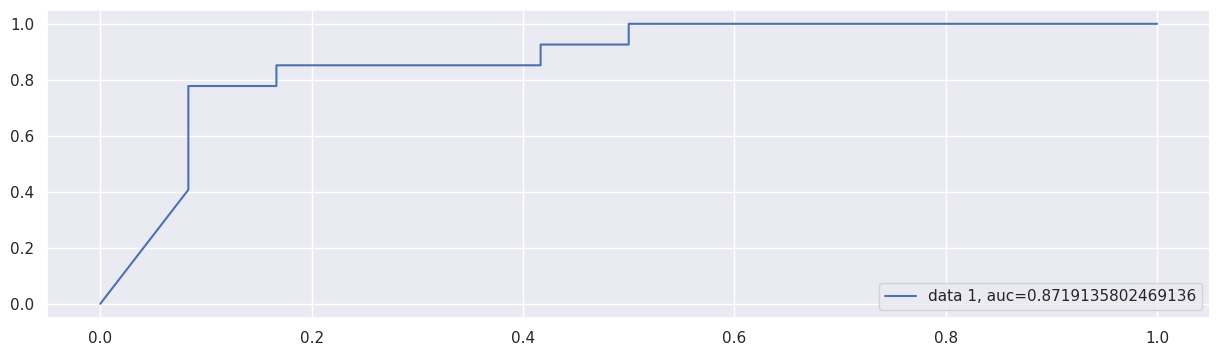

In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
pickle.dump(gnb,open ('gnb.pkl','wb'))

In [ ]:
import numpy as np
Ks = 10
mean_acc = []
ConfustionMx = [];
for n in range(2,Ks):
  #Train Model and Predict
  neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
  yhat=neigh.predict(X_test)
  mean_acc.append(metrics.accuracy_score(y_test, yhat))
print('Neighbor Accuracy List')
print(mean_acc)

Neighbor Accuracy List
[0.9487179487179487, 0.9230769230769231, 0.9487179487179487, 0.9230769230769231, 0.8461538461538461, 0.8717948717948718, 0.8717948717948718, 0.8974358974358975]


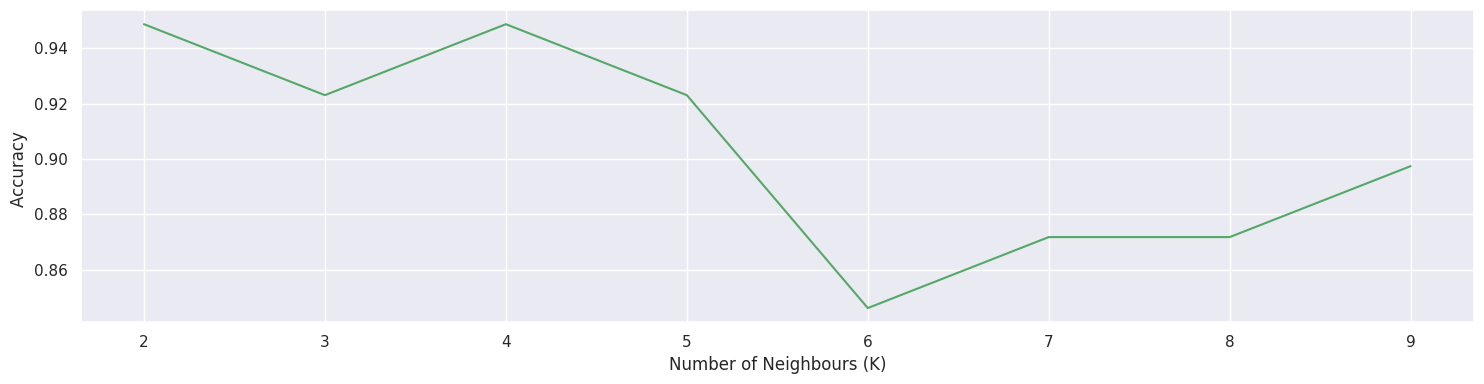

In [ ]:
plt.plot(range(2,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predKNN = knn.predict(X_test)


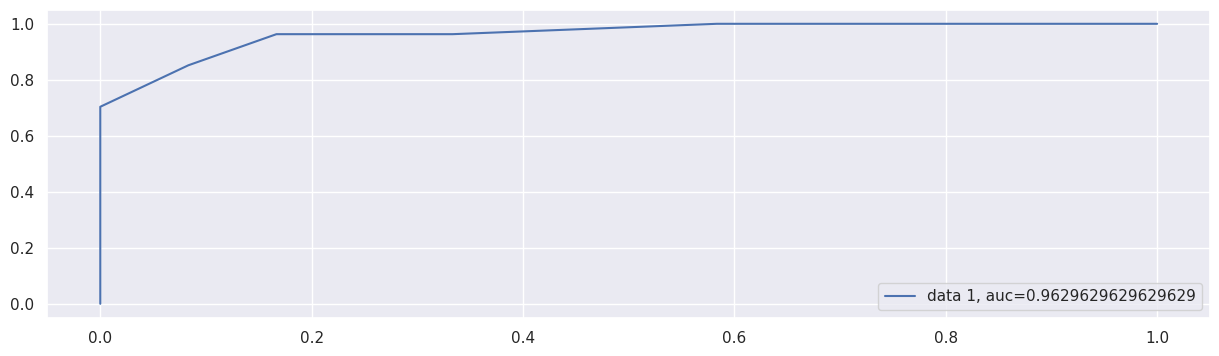

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
# Dumping KNN Classifier
pickle.dump(knn, open('knn_clf.pkl','wb'))

In [ ]:
# Defining Parameter Dictionary
param_dict = {'max_depth': range(4,8), 'eta' : [0.1, 0.2, 0.3, 0.4, 0.5],
'reg_lambda' : [0.8, 0.9, 1, 1.1, 1.2],
'random_state': [300, 600, 900]}


In [ ]:

import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, r2_score

# Assuming predlog, predgnb, predKNN, and y_test are defined elsewhere in your code

chart = {
    'Metric': ["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
    'LR': [
        accuracy_score(y_test, predlog),
        f1_score(y_test, predlog),
        recall_score(y_test, predlog),
        precision_score(y_test, predlog),
        r2_score(y_test, predlog)  # Assuming you have defined the R2 score properly
    ],
    'NB': [
        accuracy_score(y_test, predgnb),
        f1_score(y_test, predgnb),
        recall_score(y_test, predgnb),
        precision_score(y_test, predgnb),
        r2_score(y_test, predgnb)  # Assuming you have defined the R2 score properly
    ],
    'KNN': [
        accuracy_score(y_test, predKNN),
        f1_score(y_test, predKNN),
        recall_score(y_test, predKNN),
        precision_score(y_test, predKNN),
        r2_score(y_test, predKNN)  # Assuming you have defined the R2 score properly
    ]
}

chart = pd.DataFrame(chart)
print(chart)



      Metric        LR        NB       KNN
0   Accuracy  0.846154  0.641026  0.923077
1   F1-Score  0.896552  0.666667  0.945455
2     Recall  0.962963  0.518519  0.962963
3  Precision  0.838710  0.933333  0.928571
4   R2-Score  0.277778 -0.685185  0.638889


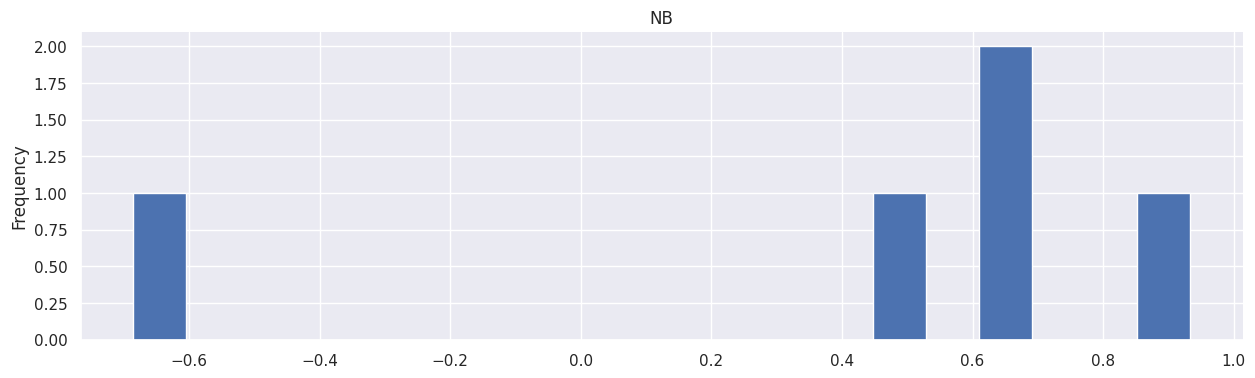

In [ ]:
from matplotlib import pyplot as plt
chart['NB'].plot(kind='hist', bins=20, title='NB')
plt.gca().spines[['top', 'right',]].set_visible(False)

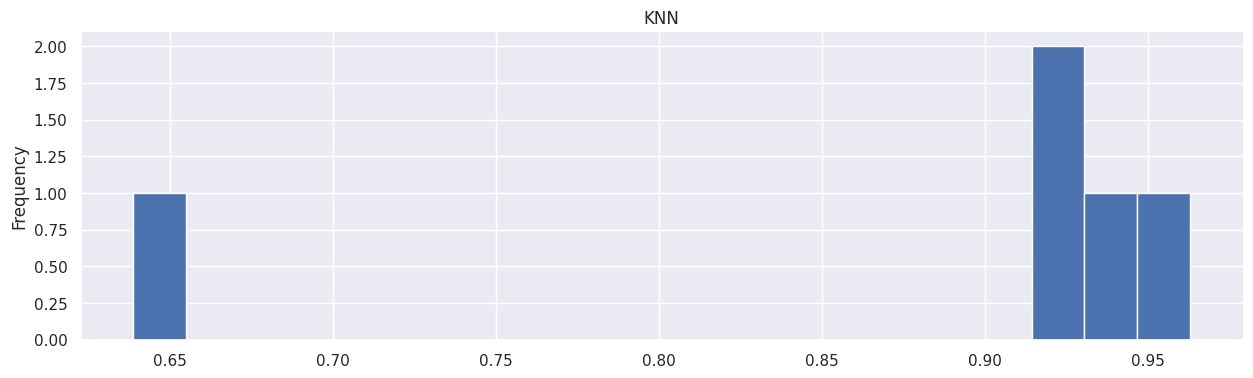

In [ ]:
from matplotlib import pyplot as plt
chart['KNN'].plot(kind='hist', bins=20, title='KNN')
plt.gca().spines[['top', 'right',]].set_visible(False)

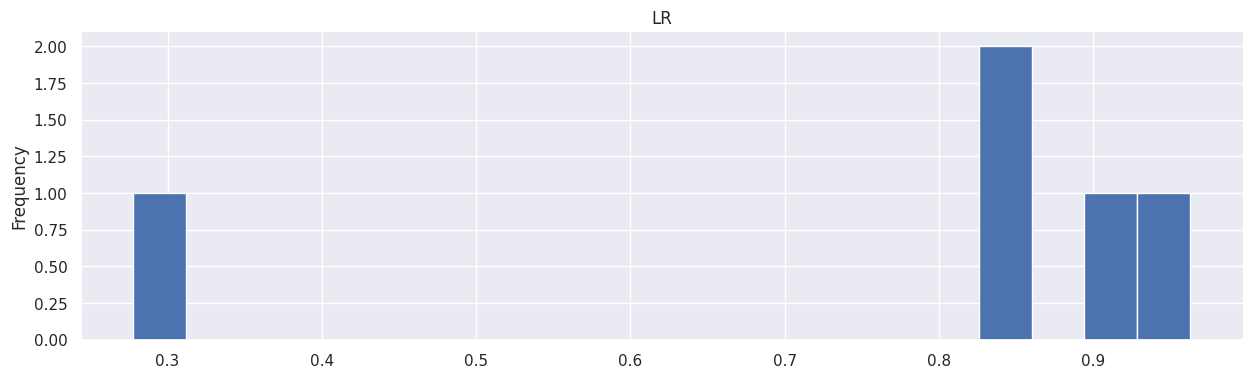

In [ ]:
from matplotlib import pyplot as plt
chart['LR'].plot(kind='hist', bins=20, title='LR')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
# Initialize Logistic Regression and Naive Bayes classifiers
logmodel = LogisticRegression()
gnb = GaussianNB()

In [ ]:
# Fit both models on training data
logmodel.fit(X_train, y_train)
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict probabilities for both models
log_prob = logmodel.predict_proba(X_test)[:, 1]
gnb_prob = gnb.predict_proba(X_test)[:, 1]

In [ ]:
# Weighted average of probabilities
hybrid_prob = (log_prob + gnb_prob) / 2

In [ ]:
# Compute accuracy for each model
log_accuracy = accuracy_score(y_test, logmodel.predict(X_test))
gnb_accuracy = accuracy_score(y_test, gnb.predict(X_test))


In [ ]:
# Compute AUC for each model
log_auc = roc_auc_score(y_test, log_prob)
gnb_auc = roc_auc_score(y_test, gnb_prob)
hybrid_auc = roc_auc_score(y_test, hybrid_prob)


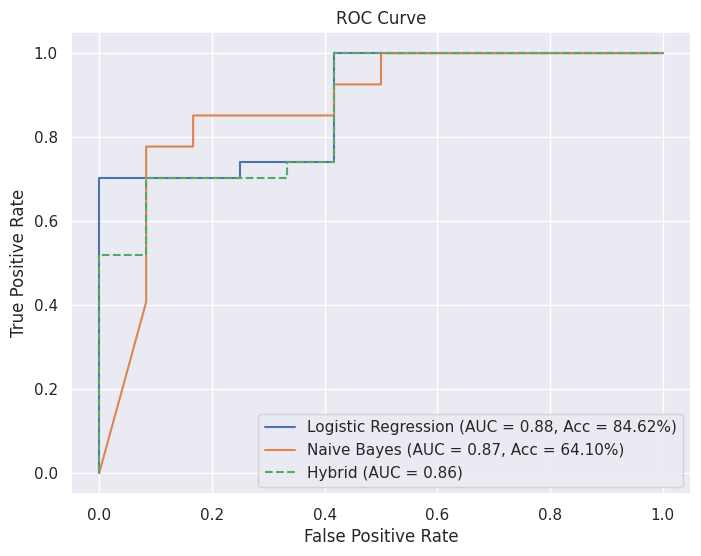

In [ ]:
# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
fpr_log, tpr_log, _ = roc_curve(y_test, log_prob)
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb_prob)
fpr_hybrid, tpr_hybrid, _ = roc_curve(y_test, hybrid_prob)
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = {:.2f}, Acc = {:.2f}%)'.format(log_auc, log_accuracy * 100))
plt.plot(fpr_gnb, tpr_gnb, label='Naive Bayes (AUC = {:.2f}, Acc = {:.2f}%)'.format(gnb_auc, gnb_accuracy * 100))
plt.plot(fpr_hybrid, tpr_hybrid, label='Hybrid (AUC = {:.2f})'.format(hybrid_auc), linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

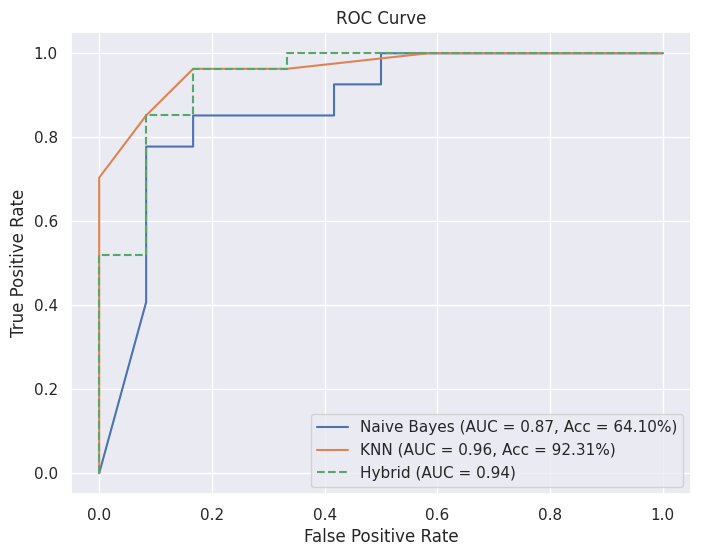

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Initialize Naive Bayes and KNN classifiers
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
# Fit both models on training data
gnb.fit(X_train, y_train)
knn.fit(X_train, y_train)
# Predict probabilities for both models
gnb_prob = gnb.predict_proba(X_test)[:, 1]
knn_prob = knn.predict_proba(X_test)[:, 1]
# Weighted average of probabilities
hybrid_prob = (gnb_prob + knn_prob) / 2
# Compute accuracy for each model
gnb_accuracy = accuracy_score(y_test, gnb.predict(X_test))
knn_accuracy = accuracy_score(y_test, knn.predict(X_test))
# Compute AUC for each model
gnb_auc = roc_auc_score(y_test, gnb_prob)
knn_auc = roc_auc_score(y_test, knn_prob)
hybrid_auc = roc_auc_score(y_test, hybrid_prob)
# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb_prob)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_prob)
fpr_hybrid, tpr_hybrid, _ = roc_curve(y_test, hybrid_prob)
plt.plot(fpr_gnb, tpr_gnb, label='Naive Bayes (AUC = {:.2f}, Acc = {:.2f}%)'.format(gnb_auc, gnb_accuracy * 100))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f}, Acc = {:.2f}%)'.format(knn_auc, knn_accuracy * 100))
plt.plot(fpr_hybrid, tpr_hybrid, label='Hybrid (AUC = {:.2f})'.format(hybrid_auc), linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


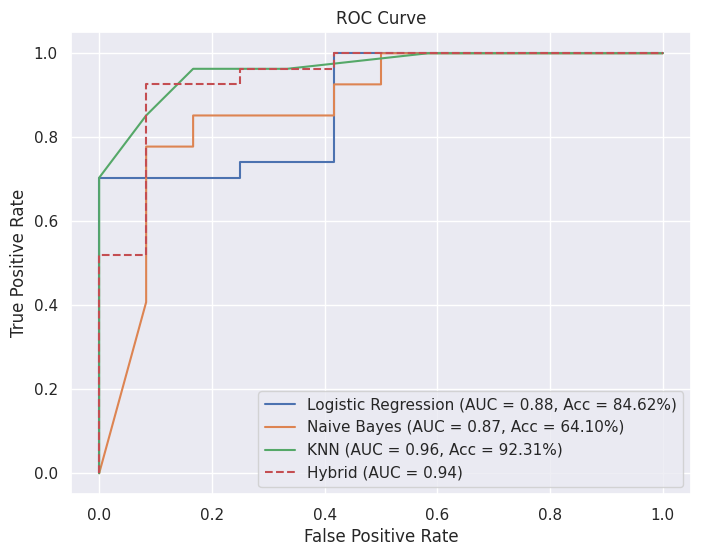

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Initialize classifiers
logmodel = LogisticRegression()
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
# Fit all models on training data
logmodel.fit(X_train, y_train)
gnb.fit(X_train, y_train)
knn.fit(X_train, y_train)
# Predict probabilities for all models
log_prob = logmodel.predict_proba(X_test)[:, 1]
gnb_prob = gnb.predict_proba(X_test)[:, 1]
knn_prob = knn.predict_proba(X_test)[:, 1]
# Weighted average of probabilities
hybrid_prob = (log_prob + gnb_prob + knn_prob) / 3
# Compute accuracy for each model
log_accuracy = accuracy_score(y_test, logmodel.predict(X_test))
gnb_accuracy = accuracy_score(y_test, gnb.predict(X_test))
knn_accuracy = accuracy_score(y_test, knn.predict(X_test))
# Compute AUC for each model
log_auc = roc_auc_score(y_test, log_prob)
gnb_auc = roc_auc_score(y_test, gnb_prob)
knn_auc = roc_auc_score(y_test, knn_prob)
hybrid_auc = roc_auc_score(y_test, hybrid_prob)
# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
fpr_log, tpr_log, _ = roc_curve(y_test, log_prob)
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb_prob)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_prob)
fpr_hybrid, tpr_hybrid, _ = roc_curve(y_test, hybrid_prob)
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = {:.2f}, Acc = {:.2f}%)'.format(log_auc, log_accuracy * 100))
plt.plot(fpr_gnb, tpr_gnb, label='Naive Bayes (AUC = {:.2f}, Acc = {:.2f}%)'.format(gnb_auc, gnb_accuracy * 100))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f}, Acc = {:.2f}%)'.format(knn_auc, knn_accuracy * 100))
plt.plot(fpr_hybrid, tpr_hybrid, label='Hybrid (AUC = {:.2f})'.format(hybrid_auc), linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

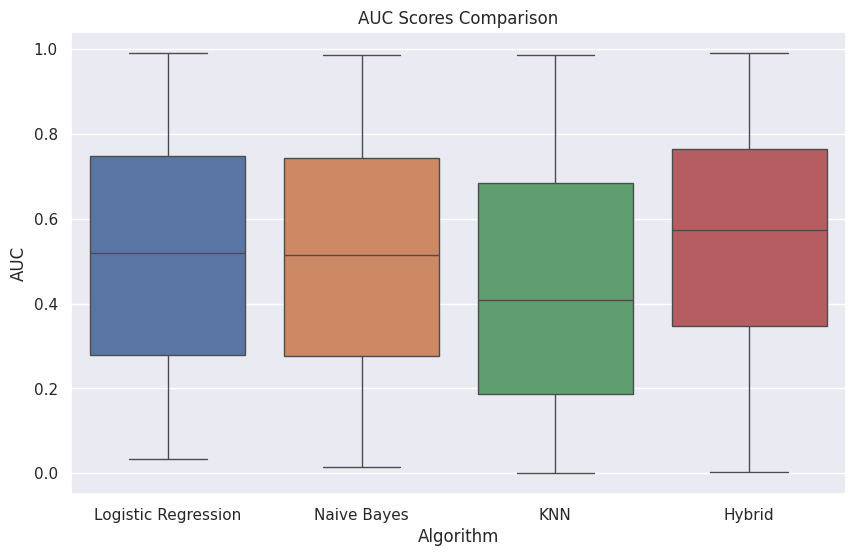

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming you have a DataFrame 'data' with multiple observations for each algorithm
# For demonstration purposes, I'll create a random dataset
import pandas as pd
import numpy as np
algorithms = ['Logistic Regression', 'Naive Bayes', 'KNN', 'Hybrid']
auc_scores = np.random.rand(100, 4) # Random AUC scores for 100 observations and 4 algorithms
# Create a DataFrame for visualization
data = pd.DataFrame(auc_scores, columns=algorithms)
# Plotting box plots for AUC scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('AUC Scores Comparison')
plt.xlabel('Algorithm')
plt.ylabel('AUC')
plt.show()

Model saved as random_forest_model.pkl
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

Confusion Matrix:
 [[ 5  2]
 [ 0 32]]
Accuracy: 94.87%


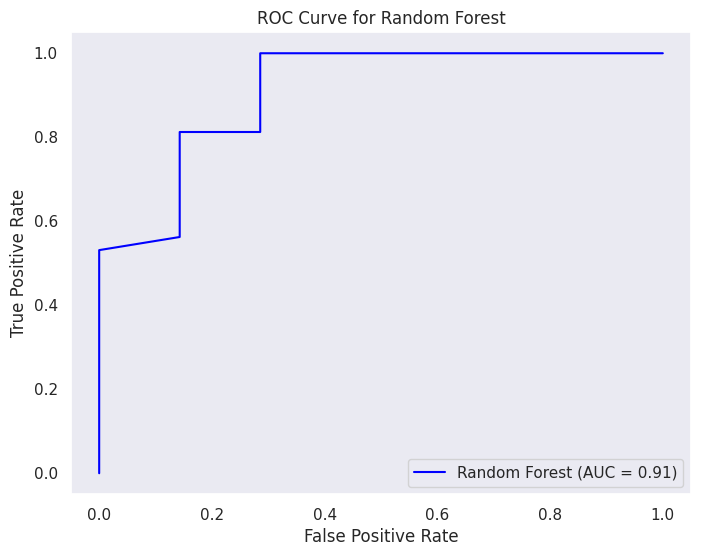

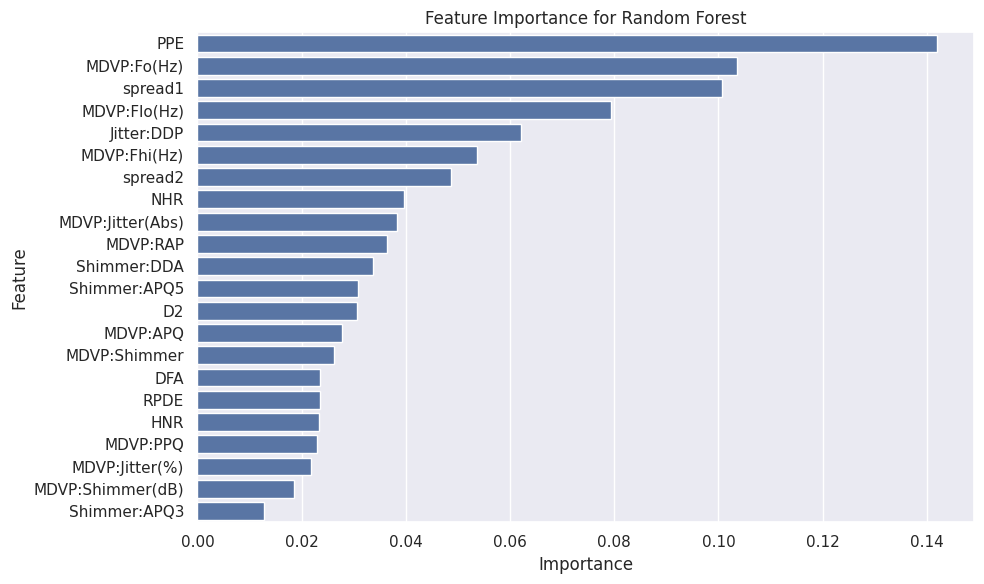

In [ ]:
#Random Foresst
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import joblib  # For saving the model

# Load the dataset
df = pd.read_csv('/content/parkinsons dataset.csv')

# Dropping the 'name' column as it's not needed for model building
df.drop(['name'], axis=1, inplace=True)

# Convert the target variable 'status' to integer
df['status'] = df['status'].astype('uint8')

# Splitting the dataset into features (X) and target (y)
X = df.drop(['status'], axis=1)
y = df['status']

# Normalize the feature values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets (80%-20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Save the trained Random Forest model to a .pkl file
model_filename = "random_forest_model.pkl"
joblib.dump(rf_model, model_filename)
print(f"Model saved as {model_filename}")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))

# Predict probabilities for ROC curve
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate AUC and plot ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc_rf), color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.grid()
plt.show()

# Feature Importance Visualization
importances = rf_model.feature_importances_
feature_names = X.columns

# Creating a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

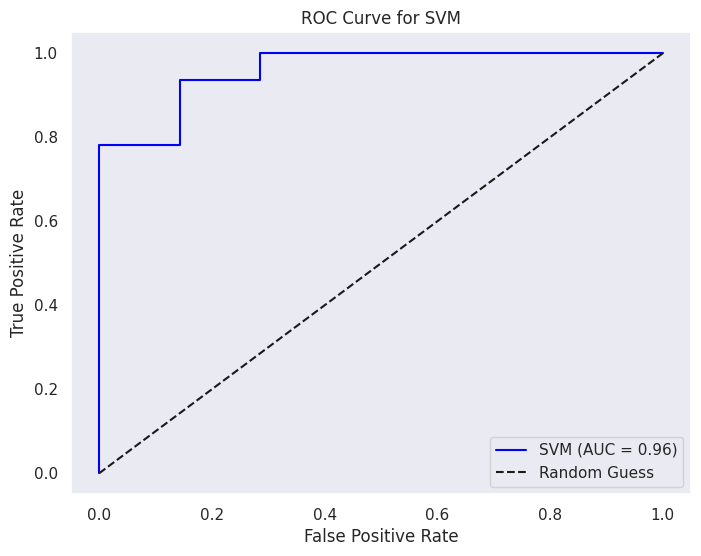

In [ ]:
#Support Vector Machine(SVM)
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE  # For balancing the dataset
import matplotlib.pyplot as plt
import joblib  # For saving the model

# Load the dataset
data = pd.read_csv('parkinsons dataset.csv')

# Separate features and target variable
X = data.drop(columns=['status', 'name'])  # Features
y = data['status']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalize the feature values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE)
selector = RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
print("\nBest Parameters:", best_params)

# Train the SVM model with optimal parameters
svm_model = SVC(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'], probability=True)
svm_model.fit(X_train, y_train)

# Save the trained model to a .pkl file
model_filename = "svm_model.pkl"
joblib.dump(svm_model, model_filename)
print(f"\nModel saved as {model_filename}")

# Evaluate using cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print("\nCross-Validation Accuracy:", np.mean(cv_scores))

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)

# Calculate ROC-AUC
y_proba = svm_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("\nROC-AUC Score:", roc_auc)

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='best')
plt.grid()
plt.show()


Confusion Matrix:
[[ 4  3]
 [ 0 32]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39


Accuracy Score: 0.9230769230769231

ROC-AUC Score: 0.8616071428571428


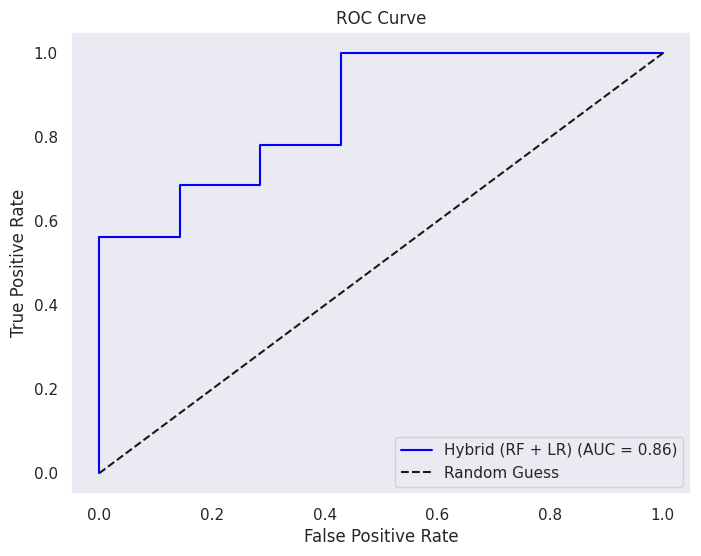


Hybrid model saved as 'hybrid_model_rf_lr.pkl'

Loaded Model Validation:
Confusion Matrix:
[[ 4  3]
 [ 0 32]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39


Loaded Model Accuracy Score: 0.9230769230769231

Loaded Model ROC-AUC Score: 0.8616071428571428


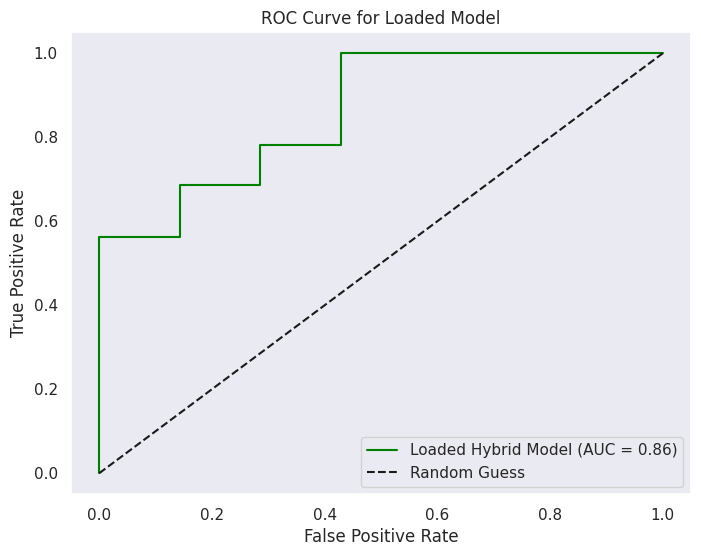

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib  # For saving the model

# Load the dataset
data = pd.read_csv('parkinsons dataset.csv')

# Separate features and target variable
# Drop both 'status' and 'name' columns for features
X = data.drop(columns=['status', 'name'])  # Features
y = data['status']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train Random Forest for feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Extract feature importance
feature_importance = rf_model.feature_importances_
important_features = np.argsort(feature_importance)[-10:]  # Top 10 features

# Reduce dataset to important features
X_train_selected = X_train_scaled[:, important_features]
X_test_selected = X_test_scaled[:, important_features]

# Step 3: Train Logistic Regression using selected features
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_selected, y_train)

# Evaluate the hybrid model
y_pred = logreg_model.predict(X_test_selected)
y_proba = logreg_model.predict_proba(X_test_selected)[:, 1]

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)

roc_auc = roc_auc_score(y_test, y_proba)
print("\nROC-AUC Score:", roc_auc)

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Hybrid (RF + LR) (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Step 4: Save the hybrid model
class HybridModel:
    def __init__(self, rf_model, logreg_model, scaler, important_features):
        self.rf_model = rf_model
        self.logreg_model = logreg_model
        self.scaler = scaler
        self.important_features = important_features

    def predict(self, X):
        # Apply scaler
        X_scaled = self.scaler.transform(X)
        # Select important features
        X_selected = X_scaled[:, self.important_features]
        # Predict using Logistic Regression
        return self.logreg_model.predict(X_selected)

    def predict_proba(self, X):
        # Apply scaler
        X_scaled = self.scaler.transform(X)
        # Select important features
        X_selected = X_scaled[:, self.important_features]
        # Predict probabilities using Logistic Regression
        return self.logreg_model.predict_proba(X_selected)

# Create and save the hybrid model
hybrid_model = HybridModel(rf_model, logreg_model, scaler, important_features)
joblib.dump(hybrid_model, 'hybrid_model_rf_lr.pkl')
print("\nHybrid model saved as 'hybrid_model_rf_lr.pkl'")

# Step 5: Load and validate the saved hybrid model
loaded_hybrid_model = joblib.load('hybrid_model_rf_lr.pkl')
y_loaded_pred = loaded_hybrid_model.predict(X_test)
y_loaded_proba = loaded_hybrid_model.predict_proba(X_test)[:, 1]

# Validate loaded model's performance
print("\nLoaded Model Validation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_loaded_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_loaded_pred))

loaded_accuracy = accuracy_score(y_test, y_loaded_pred)
print("\nLoaded Model Accuracy Score:", loaded_accuracy)

loaded_roc_auc = roc_auc_score(y_test, y_loaded_proba)
print("\nLoaded Model ROC-AUC Score:", loaded_roc_auc)

# Plot the ROC Curve for the loaded model
fpr_loaded, tpr_loaded, thresholds_loaded = roc_curve(y_test, y_loaded_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_loaded, tpr_loaded, label=f"Loaded Hybrid Model (AUC = {loaded_roc_auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Loaded Model')
plt.legend(loc='best')
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 388ms/step - accuracy: 0.7762 - loss: 0.5944 - val_accuracy: 0.7812 - val_loss: 0.4736
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6802 - loss: 0.5430 - val_accuracy: 0.7812 - val_loss: 0.4379
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6739 - loss: 0.5258 - val_accuracy: 0.7812 - val_loss: 0.4264
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.4461 - val_accuracy: 0.7812 - val_loss: 0.4233
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7854 - loss: 0.4626 - val_accuracy: 0.7812 - val_loss: 0.4199
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8558 - loss: 0.4186 - val_accuracy: 0.7812 - val_loss: 0.4195
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8719 - loss: 0.3532 - val_accuracy: 0.7500 - val_loss: 0.4132
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8654 - loss: 0.3641 - val_accuracy: 0.750

Test Accuracy: 0.90


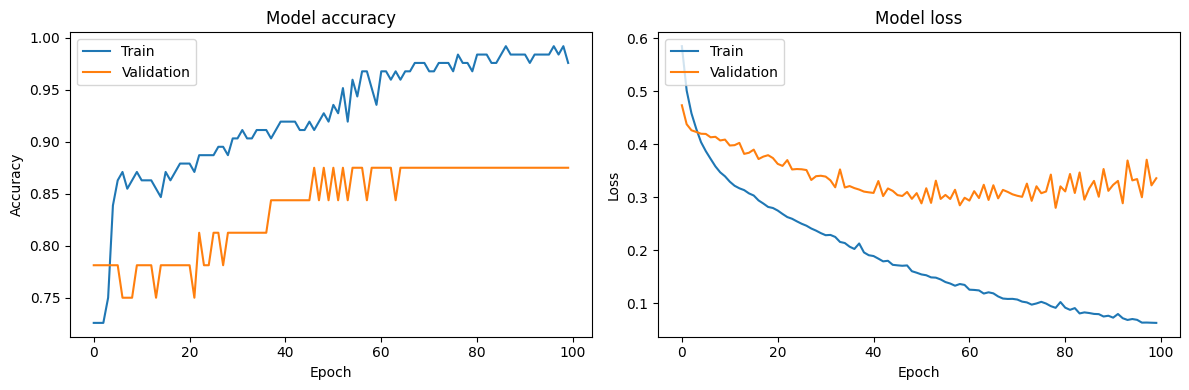

In [ ]:
#fully connected feedforward neural network (also known as a dense neural network).
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Load the dataset
df = pd.read_csv('parkinsons dataset.csv')

# Dropping the 'name' column
df.drop(['name'], axis=1, inplace=True)

# Convert the target variable 'status' to integer
df['status'] = df['status'].astype('uint8')

# Splitting the dataset into features (X) and target (y)
X = df.drop(['status'], axis=1)
y = df['status']

# Normalize the feature values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a simple neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Save the trained model to a file
model.save('neural_network_model.h5')

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 46.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:55:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model saved as xgboost_model.pkl
Accuracy Score: 0.95

Confusion Matrix:
[[ 5  2]
 [ 0 32]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39


ROC-AUC Score: 0.94


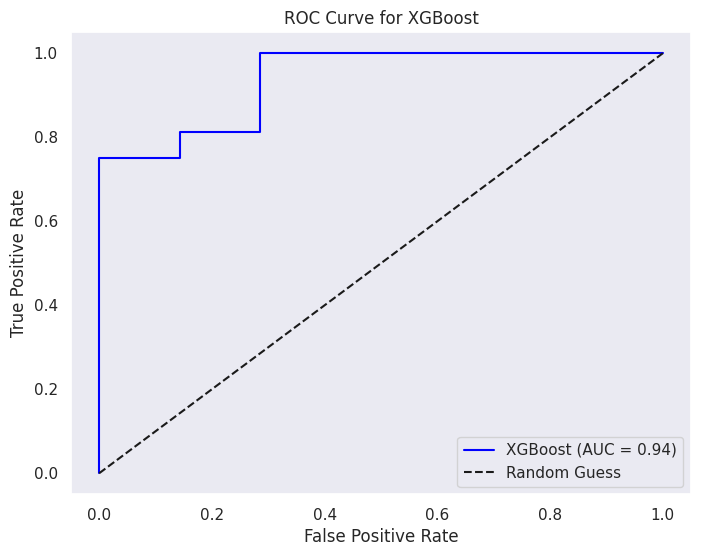

In [ ]:
# Install compatible versions
!pip install scikit-learn==0.24.2
!pip install xgboost==1.5.1

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib  # For saving the model

# Load the dataset
df = pd.read_csv('parkinsons dataset.csv')

# Dropping the 'name' column
df.drop(['name'], axis=1, inplace=True)

# Convert the target variable 'status' to integer
df['status'] = df['status'].astype('uint8')

# Splitting the dataset into features (X) and target (y)
X = df.drop(['status'], axis=1)
y = df['status']

# Normalize the feature values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and train the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Save the trained model
model_filename = 'xgboost_model.pkl'
joblib.dump(xgb_model, model_filename)
print(f"Model saved as {model_filename}")

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC
y_proba = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {roc_auc:.2f}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='best')
plt.grid()
plt.show()



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:02:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


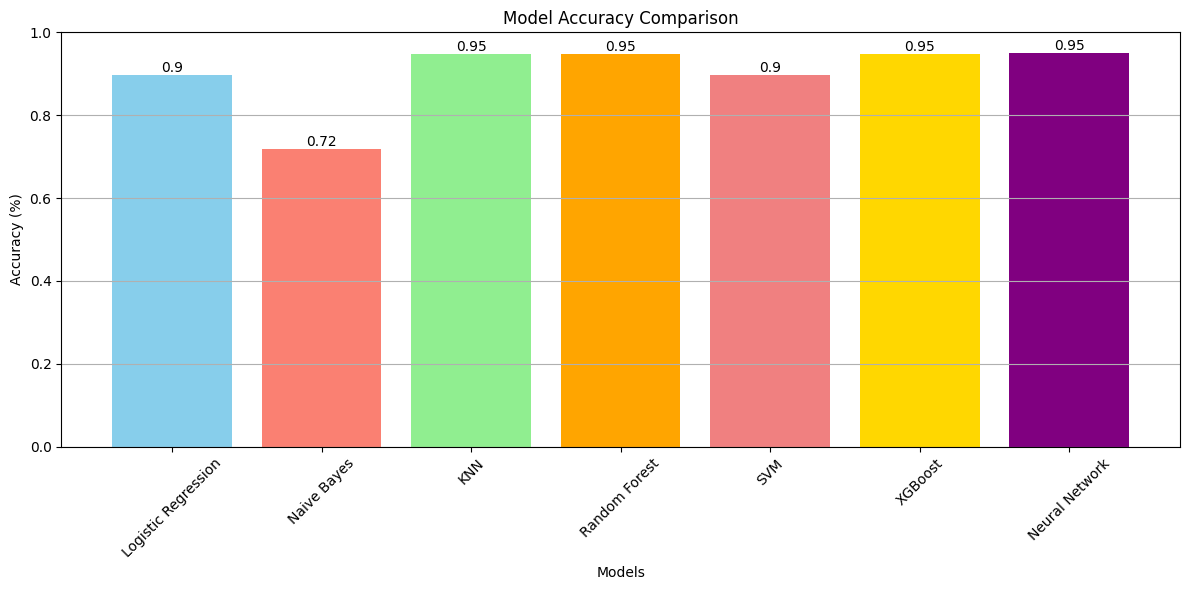

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Load the dataset
df = pd.read_csv('parkinsons dataset.csv')

# Dropping the 'name' column
df.drop(['name'], axis=1, inplace=True)

# Convert the target variable 'status' to integer
df['status'] = df['status'].astype('uint8')

# Splitting the dataset into features (X) and target (y)
X = df.drop(['status'], axis=1)
y = df['status']

# Normalize the feature values
scaler = MinMaxScaler((-1, 1))
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
logmodel = LogisticRegression()
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(probability=True)
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train models
logmodel.fit(X_train, y_train)
gnb.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_log = logmodel.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy for each model
log_accuracy = accuracy_score(y_test, y_pred_log)
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# Neural Network model's accuracy (manually set)
nn_accuracy = 0.95

# Store accuracy scores in a dictionary
accuracy_scores = {
    'Logistic Regression': log_accuracy,
    'Naive Bayes': gnb_accuracy,
    'KNN': knn_accuracy,
    'Random Forest': rf_accuracy,
    'SVM': svm_accuracy,
    'XGBoost': xgb_accuracy,
    'Neural Network': nn_accuracy
}

# Extracting model names and their corresponding accuracy scores
models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Creating the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(models, scores, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'gold', 'purple'])

# Adding accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


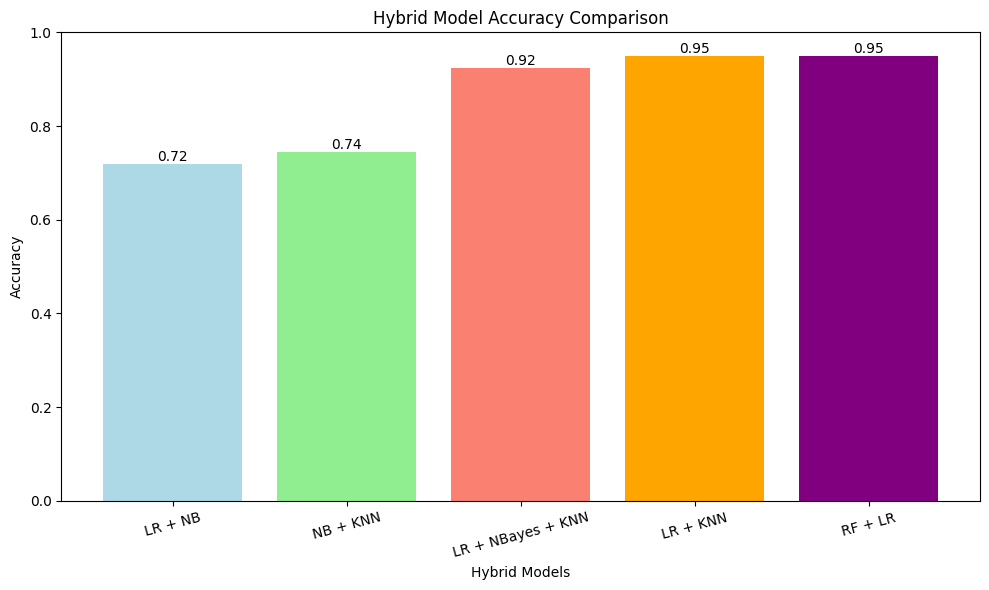

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('parkinsons dataset.csv')

# Dropping the 'name' column
df.drop(['name'], axis=1, inplace=True)

# Convert the target variable 'status' to integer
df['status'] = df['status'].astype('uint8')

# Splitting the dataset into features (X) and target (y)
X = df.drop(['status'], axis=1)
y = df['status']

# Normalize the feature values
scaler = MinMaxScaler((-1, 1))
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
logmodel = LogisticRegression()
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models
logmodel.fit(X_train, y_train)
gnb.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions for hybrid model 1 (Logistic Regression + Naive Bayes)
y_pred_log = logmodel.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
hybrid1_pred = (y_pred_log + y_pred_gnb) / 2  # Average predictions
hybrid1_pred = np.round(hybrid1_pred).astype(int)  # Convert to binary predictions

# Calculate accuracy for hybrid model 1
hybrid1_accuracy = accuracy_score(y_test, hybrid1_pred)

# Make predictions for hybrid model 2 (Naive Bayes + KNN)
y_pred_knn = knn.predict(X_test)
hybrid2_pred = (y_pred_gnb + y_pred_knn) / 2  # Average predictions
hybrid2_pred = np.round(hybrid2_pred).astype(int)  # Convert to binary predictions

# Calculate accuracy for hybrid model 2
hybrid2_accuracy = accuracy_score(y_test, hybrid2_pred)

# Make predictions for hybrid model 3 (Logistic Regression + Naive Bayes + KNN)
hybrid3_pred = (y_pred_log + y_pred_gnb + y_pred_knn) / 3  # Average predictions
hybrid3_pred = np.round(hybrid3_pred).astype(int)  # Convert to binary predictions

# Calculate accuracy for hybrid model 3
hybrid3_accuracy = accuracy_score(y_test, hybrid3_pred)

# Make predictions for hybrid model 4 (Logistic Regression + KNN)
hybrid4_pred = (y_pred_log + y_pred_knn) / 2  # Average predictions
hybrid4_pred = np.round(hybrid4_pred).astype(int)  # Convert to binary predictions

# Calculate accuracy for hybrid model 4
hybrid4_accuracy = accuracy_score(y_test, hybrid4_pred)

# Make predictions for hybrid model 5 (Random Forest + Logistic Regression)
y_pred_rf = rf_model.predict(X_test)
hybrid5_pred = (y_pred_rf + y_pred_log) / 2  # Average predictions
hybrid5_pred = np.round(hybrid5_pred).astype(int)  # Convert to binary predictions

# Calculate accuracy for hybrid model 5
hybrid5_accuracy = accuracy_score(y_test, hybrid5_pred)

# Store accuracy scores in a dictionary
hybrid_accuracy_scores = {
    'LR + NB': hybrid1_accuracy,
    'NB + KNN': hybrid2_accuracy,
    'LR + NBayes + KNN': hybrid3_accuracy,
    'LR + KNN': hybrid4_accuracy,
    'RF + LR': hybrid5_accuracy  # New hybrid model
}

# Extracting model names and their corresponding accuracy scores
hybrid_models = list(hybrid_accuracy_scores.keys())
hybrid_scores = list(hybrid_accuracy_scores.values())

# Creating the bar plot for hybrid models
plt.figure(figsize=(10,  6))
bars = plt.bar(hybrid_models, hybrid_scores, color=['lightblue', 'lightgreen', 'salmon', 'orange', 'purple'])

# Adding accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
plt.title('Hybrid Model Accuracy Comparison')
plt.xlabel('Hybrid Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Adjust layout to avoid overlaps
plt.xticks(rotation=15)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Ensures proper spacing
plt.show()